# **MEEN 423: Machine Learning for Mechanical Engineers**
# Assignment 4: Gaussian Process Regression and Bayesian Optimization

# Background

A manufacturing company has observed that the defect rate of their manufactured parts significantly varies with the operating temperature. Minimizing defect rates is crucial for improving productivity and reducing operational costs. However, extensive data collection through experimental trials is costly and time-consuming.

# Objective

The primary goal of this assignment is to use Bayesian Optimization with Gaussian Process Regression to identify the optimal operating temperature that minimizes the defect rate. This approach aims to make efficient use of existing data to guide the optimization process, thereby minimizing the need for additional costly and time-consuming experiments.

# Data

The company has historically collected 10 data points reflecting different operating temperatures (ranging from 100°C to 200°C) and the corresponding defect rates. Data file is BO_data.csv

# Set up Python Environment for this homework

In [10]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from matplotlib import pyplot as plt
import pandas as pd

# do NOT change the seed number
np.random.seed(12)

# Task

## 1. Data Visualization

Plot the dataset with temperature on the x-axis and defect rate (%) on the y-axis. Use error bar to represent the error (noise) in data.

   Temperature  Defect_Rate  Error_Bar
0        130.7    43.374911       0.25
1        105.5    41.073507       0.25
2        150.5    41.027569       0.25
3        188.4    37.555329       0.25
4        144.0    42.362430       0.25
5        187.2    37.055255       0.25
6        138.0    42.921691       0.25
7        114.5    42.604723       0.25


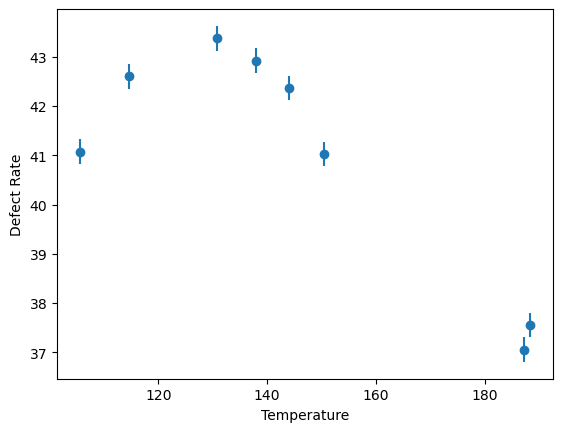

In [28]:
# Load the data
df = pd.read_csv('BO_data.csv')
print(df)

# Plot
plt.figure()
plt.errorbar(df['Temperature'], df['Defect_Rate'], fmt='o', yerr=df['Error_Bar'])
plt.xlabel('Temperature')
plt.ylabel('Defect Rate')
plt.show()

## 2. Fit the data using GPR

Use the historical data to train a GPR model. This model will serve as the surrogate function for the Bayesian Optimization process, providing a predictive distribution of the defect rate across the temperature range.

### 2.1 Use RBF kernal, write code to test the influence of different length scale parameters

In [ ]:
# Write your code here
# plot your regression reulsts using different lengthscale parameters: 1, 10, 100. Set variance of RBF to 50. Assume the noise variance of data is 1.0.
# Note: do not optimize the hyperparameters in this task (set 'optimizer=None')
# plot the Mean and Confidence interval of GPR prediction




### 2.2  What can you learn from Mean and Confidence Interval?

**Write you answer here**:



### 2.3 What are your observations from the results? What is the role of lenghscale in RBF kernal?

**Write your answer here:**





### 2.4 Optimize the RBF hyperparameters

Set `optimizer='fmin_l_bfgs_b'` in your previous code to optimize the hyperparameter.

Use `model.kernel_` to print out the resulting kernel.

In [ ]:
# Write your code here
# plot the fiting and print out the kernel after hyperparameter optimization




## 3. Bayesian optimization with pure exploitation

In this task, we will use Bayesian Optimization with Gaussian Process Regression to identify the optimal operating temperature that minimizes the defect rate.

We use a function "measure(x)" to mimic the data collection process

Run the following code but do NOT change it

In [33]:
# Code to get new data

def ground_truth_function(x):
     y =    3*np.sin(np.pi*(x-100)/50)\
         +1*np.sin(np.pi*(x-100)/100)\
         +1*np.sin(np.pi*(x+3-100)/10)\
         + 1*np.sin(np.pi*(x+3-100)/8)
     return y+40

def measure(x, std_noise = 0.25):
    #Find the ground truth, and add Gaussian noise (defined by mean and std)
    y = ground_truth_function(x) + np.random.normal(loc= 0, scale = std_noise, size = x.shape)

    #Find the uncertainty in the measurement
    y_uncertainty = std_noise
    return y, y_uncertainty

### 3.1 Write code for Bayesian optimization using pure exploitation
"Pure exploitation" means that the acquisition function is the predictive mean, while ignoring the predictive variance (uncertainty). Use `from scipy.optimize import minimize` to optimize the acquisition function.

In [ ]:
# Write your code here for Bayesian Optimization
# set the budget to 25 iterations (query 25 new data points)
# use GPR with hyperparameter optimization
# use function "measure" to get new data points
# use scipy.optimize to minimize the acquisition function
# plot the result for each active learning loop
# plot the fitting result along with ground truth, using ground_truth_function
# remember to add legend and axis labels






### 3.2 Do you get the true minimum using pure exploitation? Why or why not?



**Write your answer here:**


# 4. Bayesian optimization with Lower Confidence Bound (LCB) Acquisition Function

The Lower Confidence Bound (LCB) acquisition function can be expressed as
$$ a(\mathbf{x}) = \mu(\mathbf{x}) - \beta \sigma(\mathbf{x}) $$
where $\mu(\cdot)$ and $\sigma(\cdot)$ are predictive mean and predictive standard deviation. In this task, set the parameter $\beta$ to 10.

### 4.1 Write code for Bayesian optimization with LCB as the acquisition function

In [ ]:
# Write your code here for Bayesian Optimization
# set the budeget to 25 iterations (query 25 new data points)
# use GPR with hyperparameter optimization
# use function "measure" to get new data points
# use scipy.optimize to minimize the acquisition function
# plot the result for each active learning loop
# plot the fitting result along with ground truth, using ground_truth_function
# remember to add legend and axis labels





### 4.2: Do you get the true minimum using LCB? Why or why not?

**Write your answer here:**
